In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("diabetes_dataset.csv")

Import Libraries: Mengimpor berbagai pustaka Python yang diperlukan untuk analisis data dan machine learning:

    pandas (pd): Untuk manipulasi data.
    numpy (np): Untuk operasi numerik.
    matplotlib.pyplot (plt): Untuk visualisasi data.
    seaborn (sns): Untuk visualisasi data dengan cara yang lebih estetis.
    sklearn (scikit-learn): Untuk pembagian data, standardisasi, pelatihan model, dan evaluasi.
    warnings: Untuk mengabaikan peringatan selama eksekusi kode.

Load Data: Membaca dataset dari file CSV bernama "diabetes_dataset.csv" ke dalam DataFrame df.

Warning Suppression: Mengabaikan peringatan yang muncul selama eksekusi kode, untuk menjaga output tetap bersih.

In [18]:
print(df.describe())


                year            age  race:AfricanAmerican     race:Asian  \
count  100000.000000  100000.000000         100000.000000  100000.000000   
mean     2018.360820      41.885856              0.202230       0.200150   
std         1.345239      22.516840              0.401665       0.400114   
min      2015.000000       0.080000              0.000000       0.000000   
25%      2019.000000      24.000000              0.000000       0.000000   
50%      2019.000000      43.000000              0.000000       0.000000   
75%      2019.000000      60.000000              0.000000       0.000000   
max      2022.000000      80.000000              1.000000       1.000000   

       race:Caucasian  race:Hispanic     race:Other  hypertension  \
count   100000.000000   100000.00000  100000.000000  100000.00000   
mean         0.198760        0.19888       0.199980       0.07485   
std          0.399069        0.39916       0.399987       0.26315   
min          0.000000        0.00000   

count: Jumlah nilai non-null dalam setiap kolom.
mean: Rata-rata nilai untuk setiap kolom.
std: Deviasi standar, yang menunjukkan sebaran atau variasi nilai dalam kolom.
min: Nilai minimum dalam kolom.
25%: Kuartil pertama (25th percentile), nilai di bawahnya adalah 25% dari data.
50%: Median (50th percentile), nilai tengah dari data.
75%: Kuartil ketiga (75th percentile), nilai di bawahnya adalah 75% dari data.
max: Nilai maksimum dalam kolom.

In [19]:
print(df.isnull().sum())

year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


Output: Menampilkan nama setiap kolom diikuti oleh jumlah nilai null atau missing dalam kolom tersebut.

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

Jumlah Baris dan Kolom: Menunjukkan total baris dan kolom dalam DataFrame.
Nama Kolom: Menampilkan nama-nama kolom di DataFrame.
Tipe Data: Menunjukkan tipe data untuk setiap kolom (misalnya, integer, float, object).
Jumlah Non-Null: Menunjukkan jumlah nilai non-null dalam setiap kolom, membantu mengidentifikasi missing values.
Memory Usage: Menunjukkan seberapa banyak memori yang digunakan oleh DataFrame.

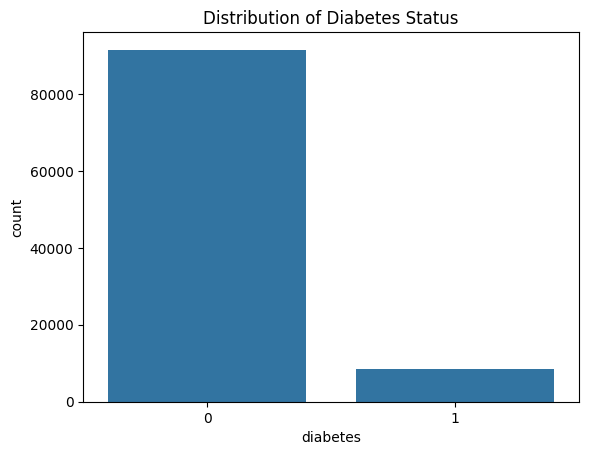

In [21]:
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Status')
plt.show()

Countplot: Menampilkan jumlah atau frekuensi masing-masing kategori status diabetes. Setiap bar mewakili jumlah individu dalam kategori diabetes tertentu (misalnya, positif dan negatif).

X-Axis: Menunjukkan kategori status diabetes.

Y-Axis: Menunjukkan jumlah individu dalam setiap kategori.

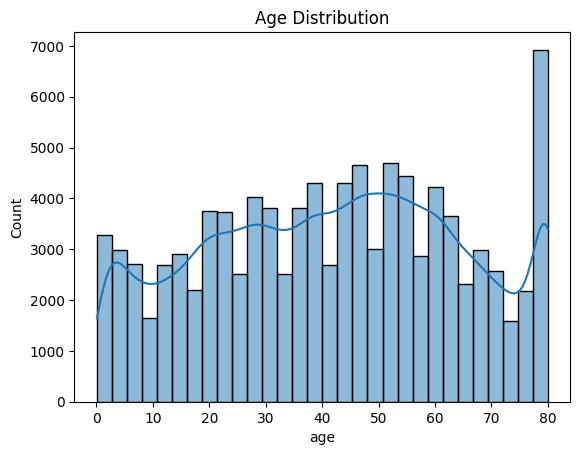

In [22]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

Histogram: Menampilkan distribusi frekuensi usia dalam 30 interval (bins). Bar-bar menunjukkan berapa banyak individu yang berada dalam setiap rentang usia.

KDE (Kernel Density Estimate): Kurva halus yang ditambahkan di atas histogram, menunjukkan estimasi kepadatan distribusi usia secara kontinu. Kurva ini membantu untuk memahami bentuk distribusi data dan mendeteksi pola yang mungkin tidak terlihat dari histogram saja.

X-Axis: Menunjukkan rentang usia.

Y-Axis: Menunjukkan frekuensi usia atau kepadatan data.

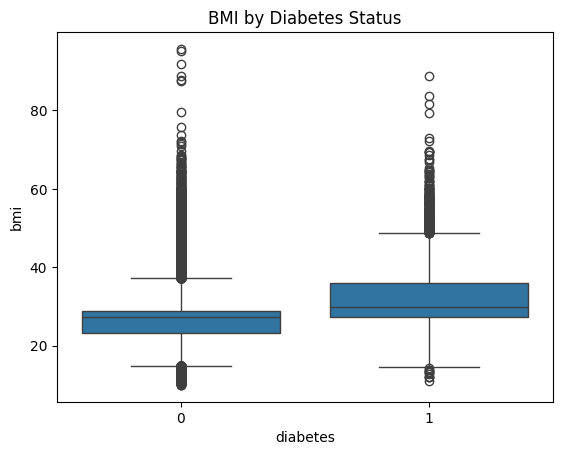

In [23]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI by Diabetes Status')
plt.show()

Boxplot: Menampilkan dua kotak (box) yang masing-masing mewakili distribusi BMI untuk dua kategori diabetes (misalnya, positif dan negatif).

    Kotak (Box): Menggambarkan rentang interkuartil (IQR) di mana 50% data berada, dengan garis di dalam kotak menunjukkan median.
    Whiskers: Garis vertikal yang mengextend dari kotak menunjukkan rentang data yang tidak dianggap sebagai outlier.
    Outliers: Titik di luar whiskers menunjukkan data yang jauh dari rentang IQR.

X-Axis: Menunjukkan status diabetes.

Y-Axis: Menunjukkan nilai BMI.

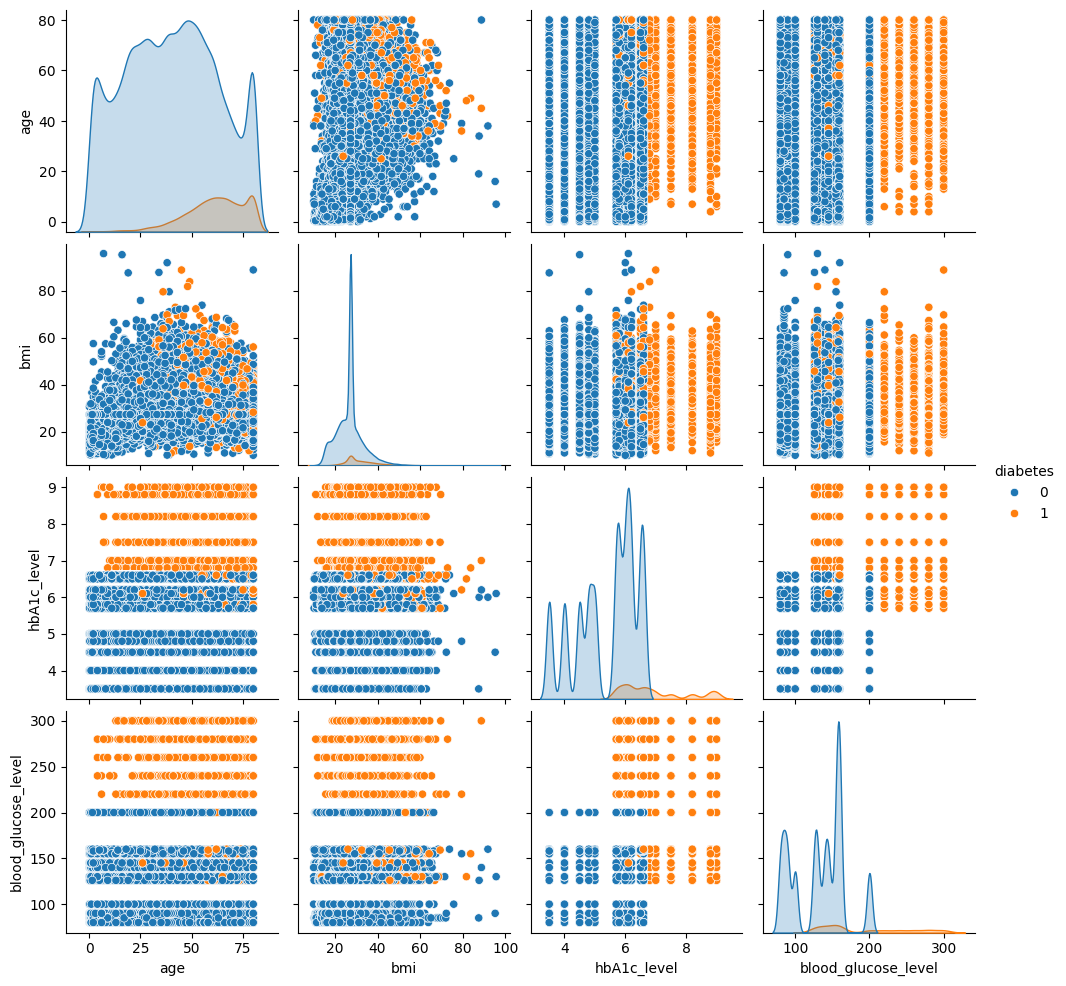

In [24]:

sns.pairplot(df[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes')
plt.show()

Scatter Plots: Setiap grafik menunjukkan hubungan antara dua fitur. Misalnya, plot antara age dan bmi menunjukkan bagaimana variabel ini berhubungan satu sama lain.
Histograms: Diagonal pairplot menampilkan histogram distribusi dari setiap fitur.
Color Coding: Data diwarnai berdasarkan kolom diabetes, sehingga dapat dilihat bagaimana fitur-fitur ini berhubungan dengan status diabetes. Biasanya, warna yang berbeda mewakili kategori diabetes yang berbeda (misalnya, positif dan negatif).

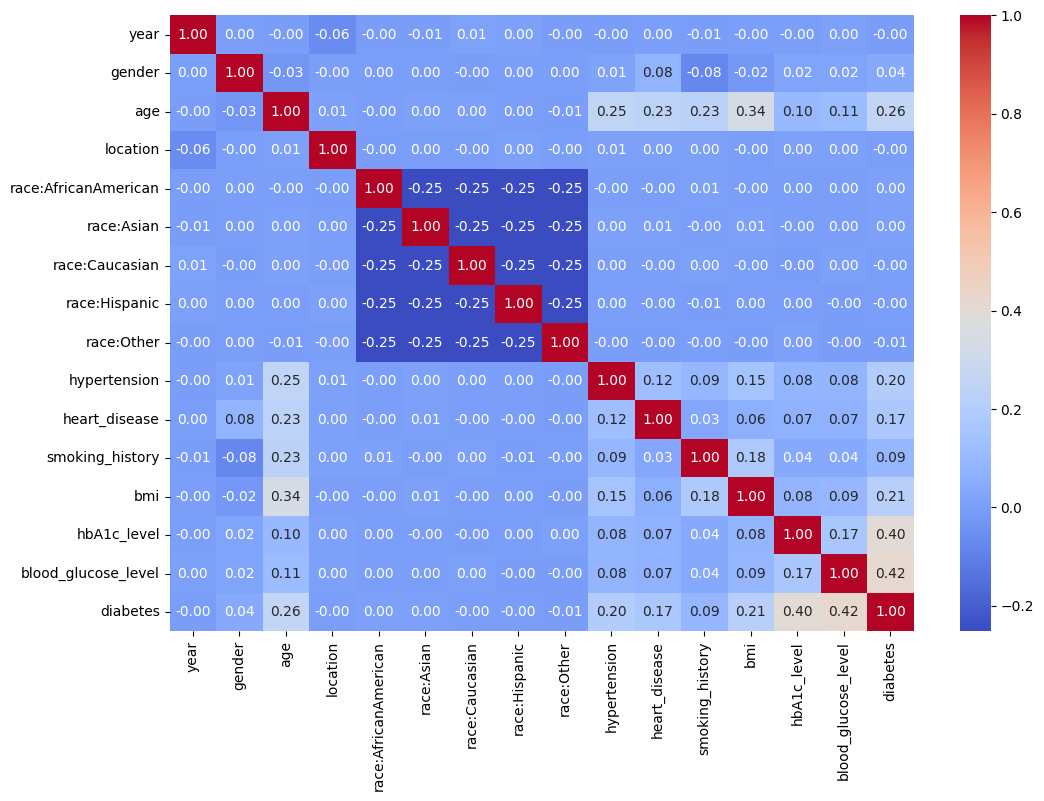

In [29]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Nilai: Angka di setiap sel menggambarkan tingkat korelasi antara dua fitur. Nilai berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna). Nilai 0 berarti tidak ada korelasi.
Warna: Warna sel menunjukkan kekuatan dan arah korelasi. Misalnya, warna merah mungkin menunjukkan korelasi positif tinggi, sementara warna biru menunjukkan korelasi negatif tinggi.

In [26]:
label_encoders = {}
for column in ['gender', 'location', 'smoking_history']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop('diabetes', axis=1)
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.9, random_state=42)

Label Encoding:

    Encode kolom kategorikal gender, location, dan smoking_history menjadi nilai numerik agar bisa digunakan dalam model machine learning.

Pemisahan Fitur dan Target:

    X: Semua fitur kecuali kolom diabetes.
    y: Kolom diabetes sebagai target variabel.

Normalisasi Data:

    Gunakan StandardScaler untuk menstandarisasi fitur sehingga setiap fitur memiliki mean = 0 dan standar deviasi = 1.

Pembagian Data:

    Bagi data menjadi set pelatihan (10%) dan set pengujian (90%) menggunakan train_test_split.

XGBoost Accuracy: 0.97
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.97
Naive Bayes Accuracy: 0.90
SVM Accuracy: 0.96


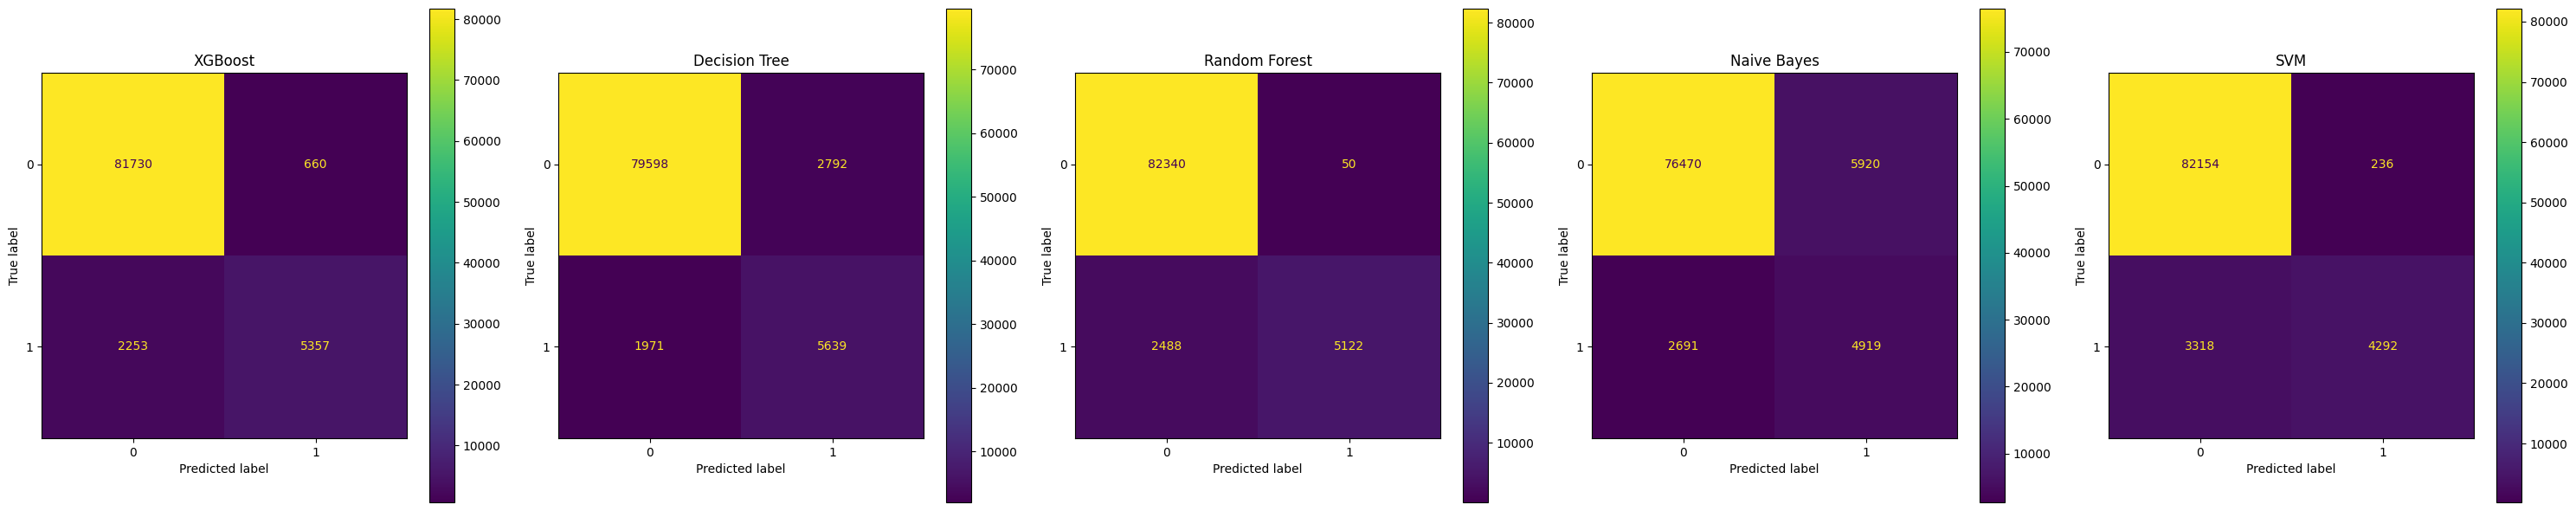

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()
svm_model = SVC(random_state=42)

# Melatih model
xgb_model.fit(X_train_scaled, y_train)
dec_tree.fit(X_train_scaled, y_train)
rand_forest.fit(X_train_scaled, y_train)
naive_bayes.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_dec_tree = dec_tree.predict(X_test_scaled)
y_pred_rand_forest = rand_forest.predict(X_test_scaled)
y_pred_naive_bayes = naive_bayes.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluasi akurasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_dec_tree = accuracy_score(y_test, y_pred_dec_tree)
accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dec_tree:.2f}')
print(f'Random Forest Accuracy: {accuracy_rand_forest:.2f}')
print(f'Naive Bayes Accuracy: {accuracy_naive_bayes:.2f}')
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Menampilkan Confusion Matrix
fig, axes = plt.subplots(1, 5, figsize=(30, 6))

for ax, model, y_pred, title in zip(
    axes,
    [xgb_model, dec_tree, rand_forest, naive_bayes, svm_model],
    [y_pred_xgb, y_pred_dec_tree, y_pred_rand_forest, y_pred_naive_bayes, y_pred_svm],
    ['XGBoost', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVM']
):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax, values_format='d')
    ax.set_title(title)

plt.tight_layout()
plt.show()


Penjelasan dan Kesimpulan Hasil Evaluasi Model
Penjelasan:

    XGBoost Accuracy: 0.97
        Model XGBoost menghasilkan akurasi yang sangat tinggi sebesar 97%. Ini menunjukkan bahwa model ini sangat efektif dalam memprediksi data uji.

    Decision Tree Accuracy: 0.95
        Model Decision Tree juga menunjukkan performa yang baik dengan akurasi sebesar 95%. Namun, ini sedikit lebih rendah dibandingkan dengan model XGBoost dan Random Forest.

    Random Forest Accuracy: 0.97
        Model Random Forest mencapai akurasi yang sama tinggi dengan XGBoost, yaitu 97%. Ini menunjukkan bahwa Random Forest juga merupakan model yang sangat kuat untuk dataset ini.

    Naive Bayes Accuracy: 0.90
        Model Naive Bayes memiliki akurasi yang lebih rendah dibandingkan dengan model lain, yaitu 90%. Meskipun masih tergolong tinggi, model ini tidak seefektif model lain dalam memprediksi data uji.

    SVM Accuracy: 0.96
        Model SVM juga menunjukkan performa yang sangat baik dengan akurasi sebesar 96%. Ini menunjukkan bahwa SVM adalah model yang efektif untuk dataset ini.

Kesimpulan:

    Model XGBoost dan Random Forest adalah yang terbaik:
        Kedua model ini menghasilkan akurasi tertinggi sebesar 97%. Keduanya sangat efektif dan dapat digunakan untuk prediksi dengan tingkat keakuratan yang sangat tinggi.

    Model Decision Tree juga berkinerja baik:
        Dengan akurasi sebesar 95%, Decision Tree juga merupakan pilihan yang baik, meskipun sedikit lebih rendah daripada XGBoost dan Random Forest.

    Model SVM juga efektif:
        SVM menunjukkan akurasi sebesar 96%, yang berarti sangat kompetitif dengan model lain dan cukup andal untuk digunakan.

    Model Naive Bayes paling rendah:
        Meskipun Naive Bayes mencapai akurasi sebesar 90%, yang cukup baik, ini lebih rendah dibandingkan dengan model lain. Ini menunjukkan bahwa model ini mungkin tidak menangkap kompleksitas data sebaik model lain.

Diversitas Model:

    XGBoost: Algoritma boosting yang sering menghasilkan performa sangat baik pada dataset dengan fitur yang kompleks dan hubungan non-linear.
    Decision Tree: Model yang sederhana dan mudah diinterpretasikan, sering digunakan sebagai dasar untuk algoritma lain seperti Random Forest.
    Random Forest: Ensemble dari banyak decision tree yang mengurangi overfitting dan meningkatkan akurasi prediksi.
    Naive Bayes: Model probabilistik yang sederhana dan efisien, baik untuk data dengan asumsi independensi fitur.
    SVM (Support Vector Machine): Baik untuk data dengan margin pemisahan yang jelas dan dapat bekerja baik pada data yang memiliki dimensi tinggi.

Komparasi Kinerja:

    Menggunakan berbagai algoritma memungkinkan Anda untuk membandingkan performa model. Algoritma yang berbeda mungkin memiliki kelebihan dalam kasus penggunaan yang berbeda atau pada dataset yang berbeda.
    Dengan membandingkan akurasi dan matriks kebingungannya, Anda dapat memilih model yang paling sesuai dengan kebutuhan spesifik dari proyek Anda.

Overfitting dan Bias Varians:

    Model seperti Decision Tree mungkin mengalami overfitting jika tidak diatur dengan baik, sedangkan ensemble methods seperti Random Forest dapat mengatasi masalah ini.
    Algoritma seperti Naive Bayes dapat memberikan baseline yang berguna dan cepat, sementara XGBoost dan SVM dapat memberikan hasil yang lebih akurat tetapi dengan kompleksitas yang lebih tinggi.

Robustness:

    Menggunakan berbagai algoritma dapat memberikan pemahaman yang lebih baik tentang kekuatan dan kelemahan masing-masing model, serta bagaimana mereka bereaksi terhadap data yang berbeda.